In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [17]:
df = pd.read_csv('/home/aayushjoshi/ML/projects/weather-prediction-end-to-end/dataset/raw_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9227 entries, 0 to 9226
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    9227 non-null   object 
 1   temp    9227 non-null   float64
 2   dwpt    9227 non-null   float64
 3   rhum    9227 non-null   float64
 4   prcp    9227 non-null   float64
 5   snow    0 non-null      float64
 6   wdir    9227 non-null   float64
 7   wspd    9227 non-null   float64
 8   wpgt    0 non-null      float64
 9   pres    9227 non-null   float64
 10  tsun    0 non-null      float64
 11  coco    9227 non-null   float64
dtypes: float64(11), object(1)
memory usage: 865.2+ KB


In [18]:
df.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2023-02-01 00:00:00,9.5,3.0,64.0,0.0,NaN,48.0,9.0,NaN,1014.9,NaN,1.0
1,2023-02-01 01:00:00,9.7,2.3,60.0,0.0,NaN,49.0,10.4,NaN,1015.4,NaN,1.0
2,2023-02-01 02:00:00,10.1,2.2,58.0,0.0,NaN,47.0,11.5,NaN,1015.7,NaN,1.0
3,2023-02-01 03:00:00,12.5,5.4,62.0,0.0,NaN,50.0,11.2,NaN,1016.5,NaN,1.0
4,2023-02-01 04:00:00,17.0,9.2,60.0,0.0,NaN,106.0,7.6,NaN,1017.1,NaN,1.0


In [19]:
df.tail()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
9222,2024-02-20 06:00:00,21.3,10.5,50.0,0.0,NaN,162.0,11.9,NaN,1014.0,NaN,1.0
9223,2024-02-20 07:00:00,21.9,9.8,46.0,0.0,NaN,165.0,11.2,NaN,1013.0,NaN,1.0
9224,2024-02-20 08:00:00,21.8,9.3,45.0,0.0,NaN,183.0,10.1,NaN,1012.0,NaN,2.0
9225,2024-02-20 09:00:00,21.6,8.8,44.0,0.0,NaN,211.0,11.5,NaN,1011.2,NaN,2.0
9226,2024-02-20 10:00:00,21.4,9.3,46.0,0.0,NaN,224.0,7.2,NaN,1010.8,NaN,2.0


In [20]:
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,9227.000000,9227.000000,9227.000000,9227.000000,0.0,9227.000000,9227.000000,0.0,9227.000000,0.0,9227.000000
mean,20.830606,13.803360,68.063076,0.117395,NaN,133.556627,7.484394,NaN,1011.551198,NaN,3.614176
std,6.862609,6.651235,20.875586,0.688792,NaN,106.195270,3.040331,NaN,6.015108,NaN,2.887261
min,2.000000,-6.300000,0.000000,0.000000,NaN,0.000000,2.200000,NaN,997.000000,NaN,1.000000
25%,15.400000,8.700000,53.000000,0.000000,NaN,43.000000,6.000000,NaN,1006.500000,NaN,1.000000
50%,21.900000,12.000000,70.000000,0.000000,NaN,70.000000,6.100000,NaN,1011.900000,NaN,3.000000
75%,26.000000,20.900000,85.000000,0.000000,NaN,230.000000,8.300000,NaN,1017.000000,NaN,5.000000
max,38.000000,27.000000,100.000000,22.000000,NaN,360.000000,33.000000,NaN,1025.000000,NaN,18.000000


In [21]:
df = df.set_index('time')
df.index = pd.to_datetime(df.index)

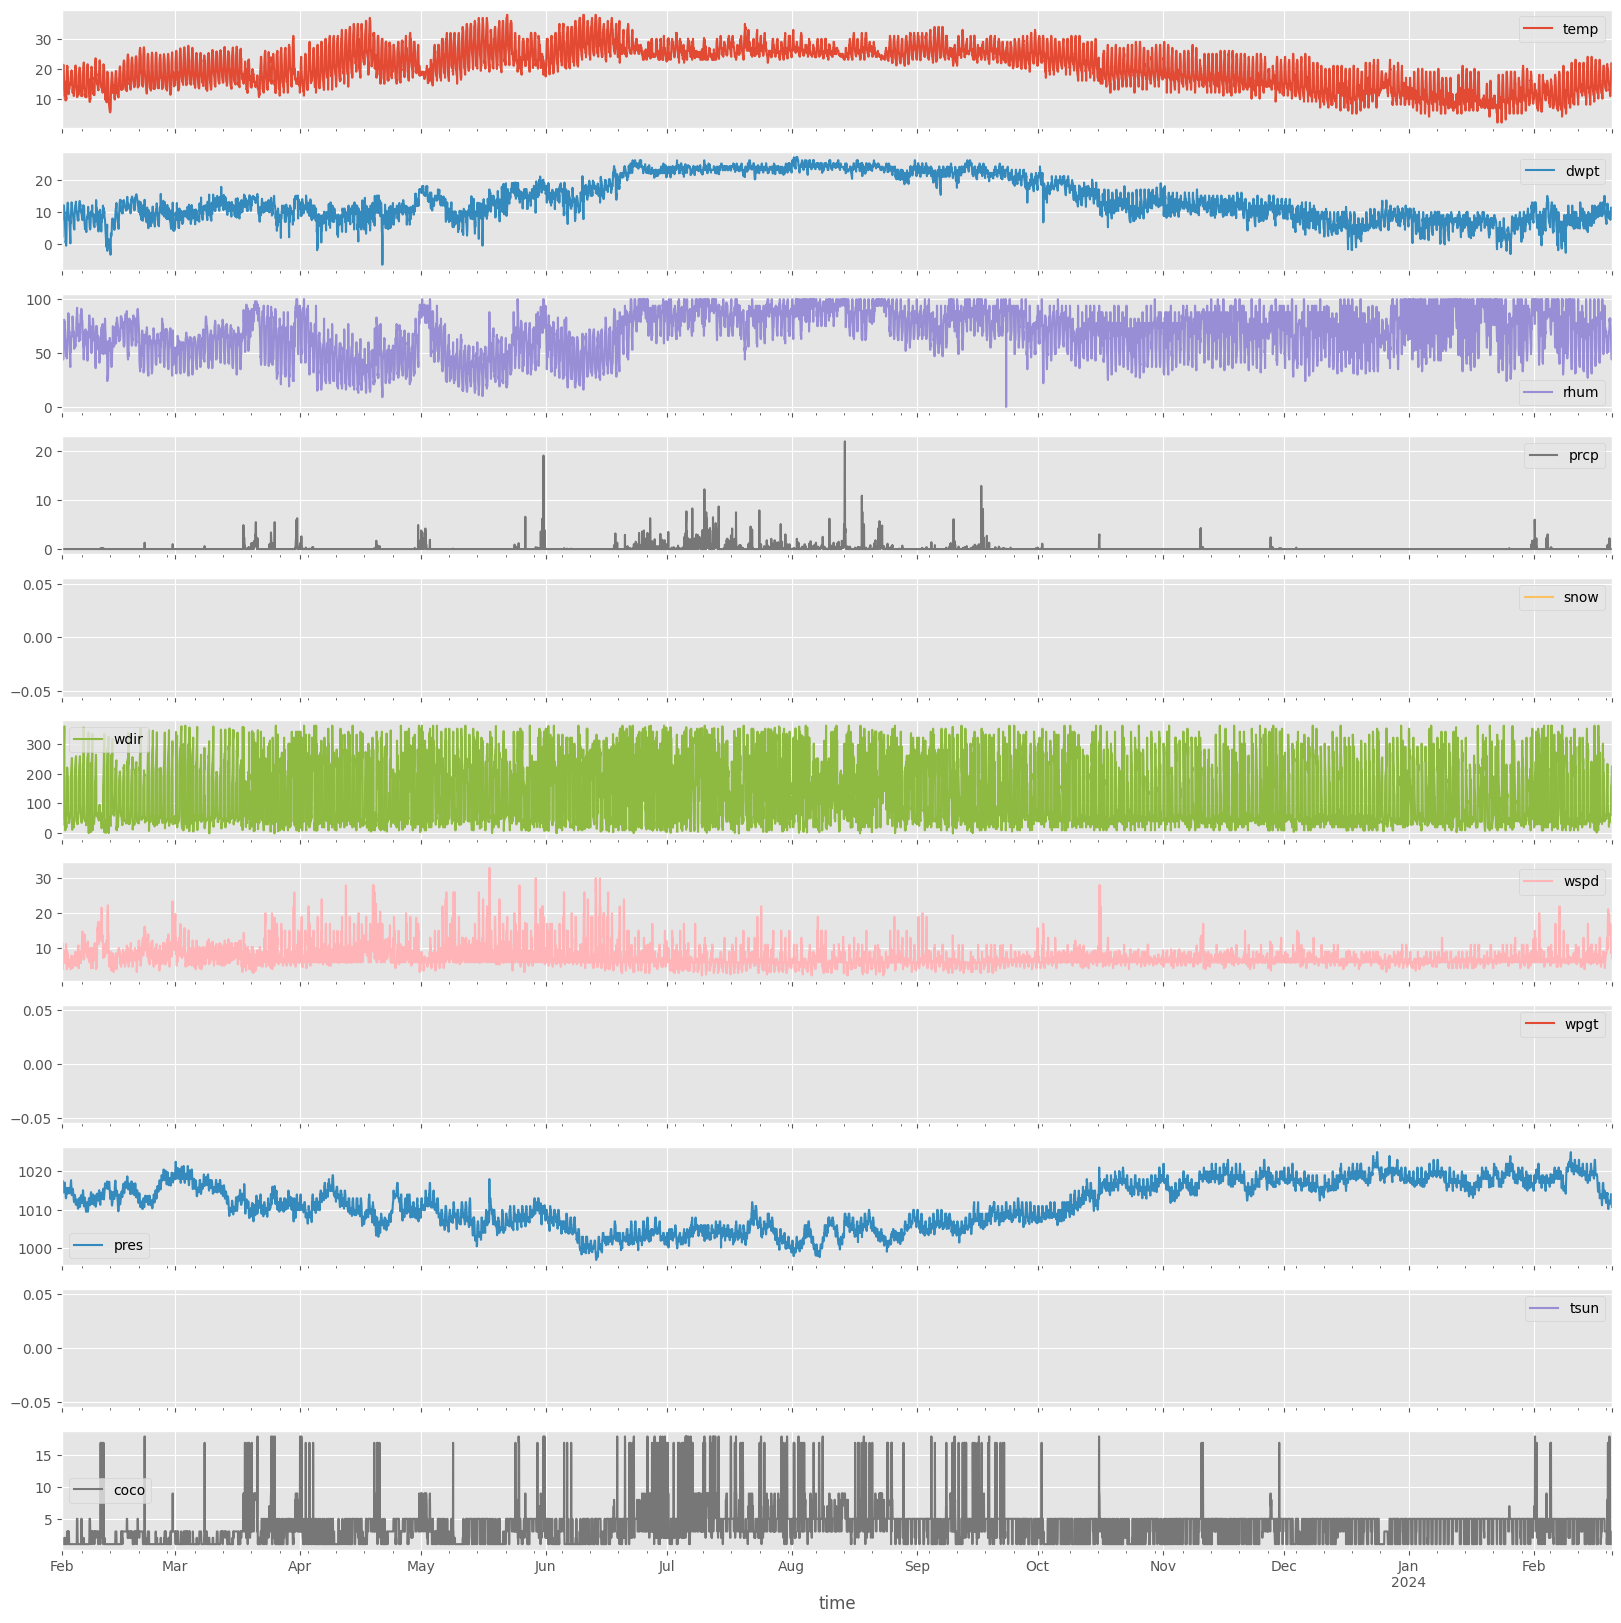

In [22]:
df.plot(subplots=True, figsize=(20,20))
plt.show()

### creating time series features

we didn't specifically needed to create these features since we already have a good enough feature set

In [23]:
def create_features(df : pd.DataFrame) -> pd.DataFrame:
    """
    Creates time series feature from datetime index such as hour, day, month, year.
    """
    df = df.copy()
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year  
    df['hour'] = df.index.hour
    return df

In [24]:
df  = create_features(df)

In [25]:
features = ['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'day', 'month', 'year', 'hour']
label = ['coco']

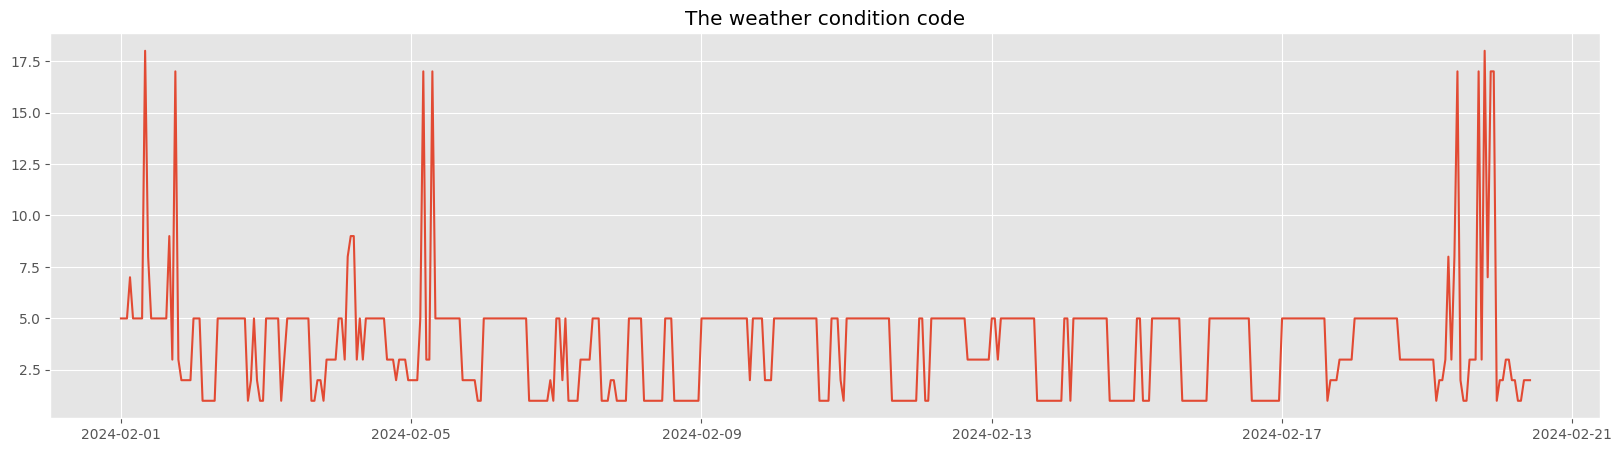

In [26]:
plt.figure(figsize=(20,5))
plt.plot(df.index[df.index >= '2024-02-01'], df['coco'].loc[df.index >= '2024-02-01'])
plt.title('The weather condition code')
plt.show()

we see such sudden jumps in the weather condition plot because the data that we are plotting is weather condition code and is not some sort of quantitative data which would also create a false sense of relation between these number codes so it is better to create dummies for them or do some sort of preprocessing

In [28]:
df['coco'] = df['coco'].astype('int')
df = df.join(pd.get_dummies(df['coco'], dtype='int')).drop('coco', axis=1).rename(columns={1:'Clear',2:'Fair',3:'Cloudy',4:'Overcast',5:'Fog',6:'Freezing Fog',7:'Light Rain',8:'Rain',9:'Heavy Rain',10:'Freezing Rain',11:'Heavy Freezing Rain',12:'Sleet',13:'Heavy Sleet',14:'Light Snowfall',15:'Snowfall',16:'Heavy Snowfall',17:'Rain Shower',18:'Heavy Rain Shower',19:'Sleet Shower',20:'Heavy Sleet Shower',21:'Snow Shower',22:'Heavy Snow Shower',23:'Lightning',24:'Hail',25:'Thunderstorm',26:'Heavy Thunderstorm',27:'Storm'})

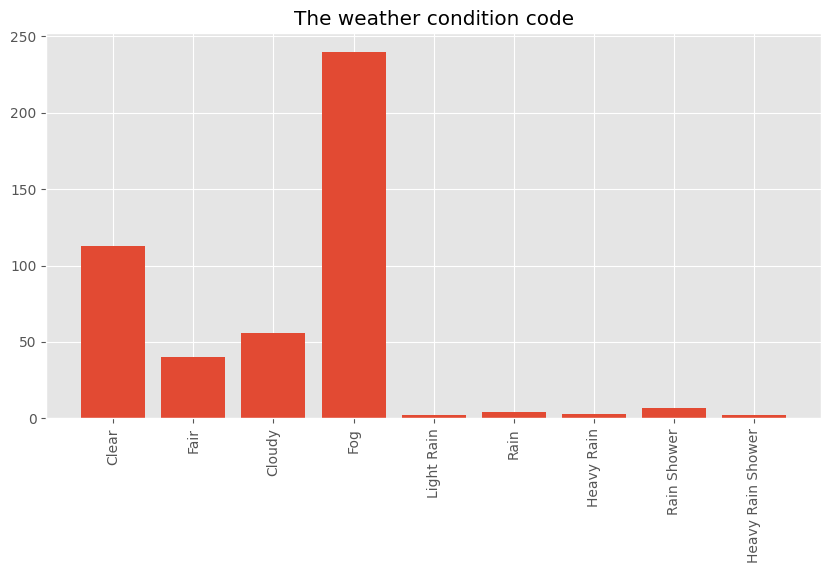

In [34]:
plt.figure(figsize=(10,5))
plt.bar(df.columns[-9:], df[df.index >= '2024-02-01'].sum().values[-9:]) # try to come up wit a better way to write this rather than hardcoding
plt.title('The weather condition code')
plt.xticks(rotation=90)
plt.show()